In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from flask import Flask, request, jsonify
import joblib
import traceback

In [6]:
# Load the datasets
train_data = pd.read_csv(r'E:\Code Academy\Final Project\Code\data\fraudTrain.csv')
test_data = pd.read_csv (r'E:\Code Academy\Final Project\Code\data\fraudTest.csv')

train_data
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [7]:
# Display basic information about the datasets
print("Train Data Info:")
print(train_data.info())

print("\nTest Data Info:")
print(test_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  l

In [8]:
# Assuming train_data is your DataFrame
train_data.drop(columns=['Unnamed: 0'], inplace=True)

# Verify that the column has been dropped
print(train_data.head())

  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393 

In [9]:
# Display the first few rows of the train dataset
print("\nTrain Data Sample:")
print(train_data.head())


Train Data Sample:
  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Ril

In [10]:
# Check for missing values in both datasets
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Train Data:
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Missing Values in Test Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip     

In [11]:
# Removing rows with missing values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [12]:
# Define a mapping dictionary
gender_mapping = {'M': 0, 'F': 1}

# Create a new column 'new_gender' using the map function
train_data['new_gender'] = train_data['gender'].map(gender_mapping)

# Display the modified DataFrame
print(train_data)


        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00

In [13]:
# Convert to DateTime Object
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])

test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

In [14]:
# Extract Year, Month, Day, Hour, Minute, Second:
#* This will extract individual components like year, month, day, etc., into separate columns.

train_data['year'] = train_data['trans_date_trans_time'].dt.year
train_data['month'] = train_data['trans_date_trans_time'].dt.month
train_data['day'] = train_data['trans_date_trans_time'].dt.day
train_data['day_of_week'] = train_data['trans_date_trans_time'].dt.dayofweek
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['minute'] = train_data['trans_date_trans_time'].dt.minute
train_data['second'] = train_data['trans_date_trans_time'].dt.second
train_data['trans_date'] = train_data['trans_date_trans_time'].dt.date
train_data['trans_time'] = train_data['trans_date_trans_time'].dt.time

test_data['year'] = test_data['trans_date_trans_time'].dt.year
test_data['month'] = test_data['trans_date_trans_time'].dt.month
test_data['day'] = test_data['trans_date_trans_time'].dt.day
test_data['day_of_week'] = test_data['trans_date_trans_time'].dt.dayofweek
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['minute'] = test_data['trans_date_trans_time'].dt.minute
test_data['second'] = test_data['trans_date_trans_time'].dt.second
test_data['trans_date'] = test_data['trans_date_trans_time'].dt.date
test_data['trans_time'] = test_data['trans_date_trans_time'].dt.time

In [15]:
# Calculate Time Differences:
#* This will calculate the time difference between consecutive rows, which can be useful for analyzing transaction frequencies.

train_data['time_diff'] = train_data['trans_date_trans_time'].diff().dt.total_seconds()

test_data['time_diff'] = test_data['trans_date_trans_time'].diff().dt.total_seconds()

In [16]:
# Grouping and Aggregation by Time Periods:
#* This will group transactions by month and calculate the total amount for each month.

train_data.groupby(train_data['trans_date_trans_time'].dt.month)['amt'].sum()

test_data.groupby(test_data['trans_date_trans_time'].dt.month)['amt'].sum()

trans_date_trans_time
6     2079538.35
7     5938212.74
8     6133478.17
9     4911000.08
10    4868952.99
11    5028587.73
12    9603133.05
Name: amt, dtype: float64

In [17]:
# Unique Categories:
unique_categories_train_data = train_data['category'].unique()

unique_categories_test_data = test_data['category'].unique()

unique_categories_train_data 

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [18]:
# Count of Each Category:
category_counts_train_data = train_data['category'].value_counts()
category_counts_test_data = test_data['category'].value_counts()

category_counts_test_data
category_counts_train_data


category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [19]:
# Grouping and Aggregation by Category:
#* This will group transactions by category and calculate the total amount for each category.
category_summary_train_data = train_data.groupby('category').agg({'amt': 'sum'})

category_summary_test_data = test_data.groupby('category').agg({'amt': 'sum'})

In [20]:
# Handling Missing Values:
train_data['category'].fillna('Unknown', inplace=True)

test_data['category'].fillna('Unknown', inplace=True)


In [21]:
# Convert to Categorical Data Type:
#* This will convert the 'category' column to the categorical data type, which can be more memory-efficient and enables certain categorical-specific operations.

train_data['category'] = train_data['category'].astype('category')

test_data['category'] = test_data['category'].astype('category')

In [22]:
# Create a dictionary mapping each category to a numerical value
category_mapping = {
    'misc_net': 0,
    'grocery_pos': 1,
    'entertainment': 2,
    'gas_transport': 3,
    'misc_pos': 4,
    'grocery_net': 5,
    'shopping_net': 6,
    'shopping_pos': 7,
    'food_dining': 8,
    'personal_care': 9,
    'health_fitness': 10,
    'travel': 11,
    'kids_pets': 12,
    'home': 13
}

# Create a new column 'category_index' by mapping the values of 'category' column using the dictionary
train_data['category_index'] = train_data['category'].map(category_mapping)

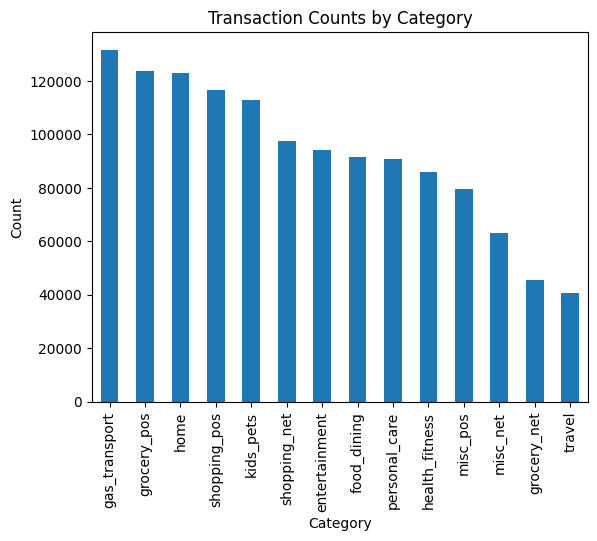

In [23]:
# Visualizing Category Distribution:
#* This will create a bar plot showing the distribution of transactions across different categories.
train_data['category'].value_counts().plot(kind='bar')
plt.title('Transaction Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [24]:
# Grouping and Aggregation by Category:
#* This will group transactions by category and calculate aggregate statistics (e.g., total amount spent) for each category.
 
category_summary_train_data = train_data.groupby('category').agg({'amt': ['mean', 'std', 'count']})
print(category_summary_train_data)

category_summary_test_data = test_data.groupby('category').agg({'amt': ['mean', 'std', 'count']})
print(category_summary_test_data)

C:\Users\Anar\AppData\Local\Temp\ipykernel_19128\3621955663.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_summary_train_data = train_data.groupby('category').agg({'amt': ['mean', 'std', 'count']})
C:\Users\Anar\AppData\Local\Temp\ipykernel_19128\3621955663.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_summary_test_data = test_data.groupby('category').agg({'amt': ['mean', 'std', 'count']})


                       amt                    
                      mean         std   count
category                                      
entertainment    64.210421   66.181129   94014
food_dining      51.086905   48.854164   91461
gas_transport    63.434572   15.886738  131659
grocery_net      53.670084   22.544396   45452
grocery_pos     116.960986   53.214365  123638
health_fitness   54.182140   48.593696   85879
home             58.270139   48.681218  123115
kids_pets        57.536871   48.722021  113035
misc_net         80.865095  166.860495   63287
misc_pos         62.890999  134.840930   79655
personal_care    47.967678   49.229970   90758
shopping_net     88.424076  247.225566   97543
shopping_pos     79.779155  231.487101  116672
travel          111.504720  615.211968   40507
                       amt                   
                      mean         std  count
category                                     
entertainment    63.984840   64.229935  40104
food_dining      

In [25]:
# Exploring Relationships with Other Variables:
#* Investigating the relationship between transaction categories and fraud occurrence rates can highlight categories with higher fraud risks, guiding preventive measures and detection strategies.

fraud_by_category = train_data.groupby('category')['is_fraud'].mean()
print(fraud_by_category)

category
entertainment     0.002478
food_dining       0.001651
gas_transport     0.004694
grocery_net       0.002948
grocery_pos       0.014098
health_fitness    0.001549
home              0.001608
kids_pets         0.002114
misc_net          0.014458
misc_pos          0.003139
personal_care     0.002424
shopping_net      0.017561
shopping_pos      0.007225
travel            0.002864
Name: is_fraud, dtype: float64


C:\Users\Anar\AppData\Local\Temp\ipykernel_19128\18214685.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_category = train_data.groupby('category')['is_fraud'].mean()


In [26]:
# Filtering DataFrame by Categories:
#* Identifying and filtering transactions in specific categories that are more commonly associated with fraudulent activities can help focus fraud detection efforts.

suspicious_transactions_train_data = train_data[train_data['category'].isin(['grocery_pos', 'misc_net', 'shopping_net'])]
print(suspicious_transactions_train_data)

suspicious_transactions_test_data = test_data[test_data['category'].isin(['grocery_pos', 'misc_net', 'shopping_net'])]
print(suspicious_transactions_test_data)

        trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
9         2019-01-01 00:06:01  2720830304681674   
10        2019-01-01 00:06:23     4642894980163   
11        2019-01-01 00:06:53   377234009633447   
...                       ...               ...   
1296636   2020-06-21 11:55:56  3534330126107879   
1296639   2020-06-21 11:57:21  4449530933957323   
1296640   2020-06-21 11:57:29      676248282243   
1296642   2020-06-21 11:59:45  3585740823295298   
1296657   2020-06-21 12:07:20     4464457352619   

                                        merchant      category     amt  \
0                     fraud_Rippin, Kub and Mann      misc_net    4.97   
1                fraud_Heller, Gutmann and Zieme   grocery_pos  107.23   
9              fraud_Schoen, Kuphal and Nitzsche   grocery_pos  198.39   
10                        fraud_Rutherford-Mertz   grocery_pos   24.74   
11               

In [27]:
# Performing Statistical Tests:
#* Performing statistical tests, such as t-tests, can help assess if there are significant differences in transaction amounts between fraudulent and non-fraudulent transactions, aiding in feature selection for fraud detection models.
from scipy.stats import ttest_ind

fraudulent_transactions = train_data[train_data['is_fraud'] == 1]
non_fraudulent_transactions = train_data[train_data['is_fraud'] == 0]

t_stat, p_value = ttest_ind(fraudulent_transactions['amt'], non_fraudulent_transactions['amt'])
print("T-statistic:", t_stat)
print("P-value:", p_value)

#! The output I received 256.078 from the t-test indicates a significant difference in transaction amounts between fraudulent and non-fraudulent transactions.

T-statistic: 256.07818064818656
P-value: 0.0


In [28]:
# Display summary statistics of the train dataset
print("\nTrain Data Summary Statistics:")
print(train_data.describe())


Train Data Summary Statistics:
               trans_date_trans_time        cc_num           amt  \
count                        1296675  1.296675e+06  1.296675e+06   
mean   2019-10-03 12:47:28.070214144  4.171920e+17  7.035104e+01   
min              2019-01-01 00:00:18  6.041621e+10  1.000000e+00   
25%       2019-06-03 19:12:22.500000  1.800429e+14  9.650000e+00   
50%              2019-10-03 07:35:47  3.521417e+15  4.752000e+01   
75%       2020-01-28 15:02:55.500000  4.642255e+15  8.314000e+01   
max              2020-06-21 12:13:37  4.992346e+18  2.894890e+04   
std                              NaN  1.308806e+18  1.603160e+02   

                zip           lat          long      city_pop     unix_time  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.880067e+04  3.853762e+01 -9.022634e+01  8.882444e+04  1.349244e+09   
min    1.257000e+03  2.002710e+01 -1.656723e+02  2.300000e+01  1.325376e+09   
25%    2.623700e+04  3.462050e+01 -9.67

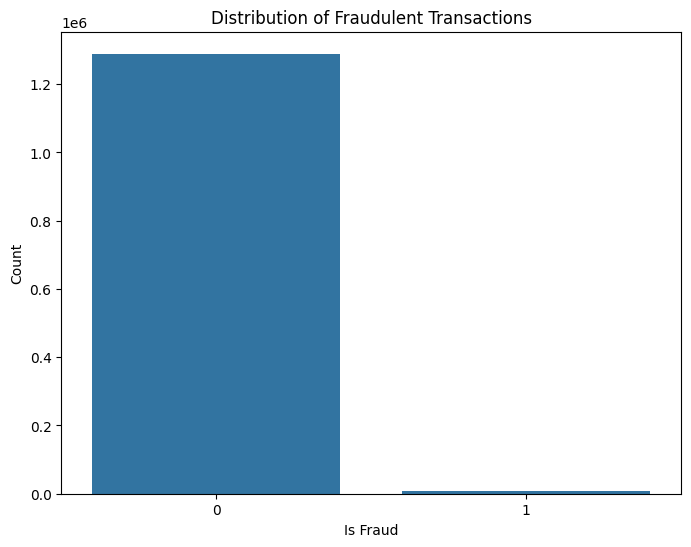

In [29]:
# Visualize the distribution of the target variable (fraudulent or not)
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

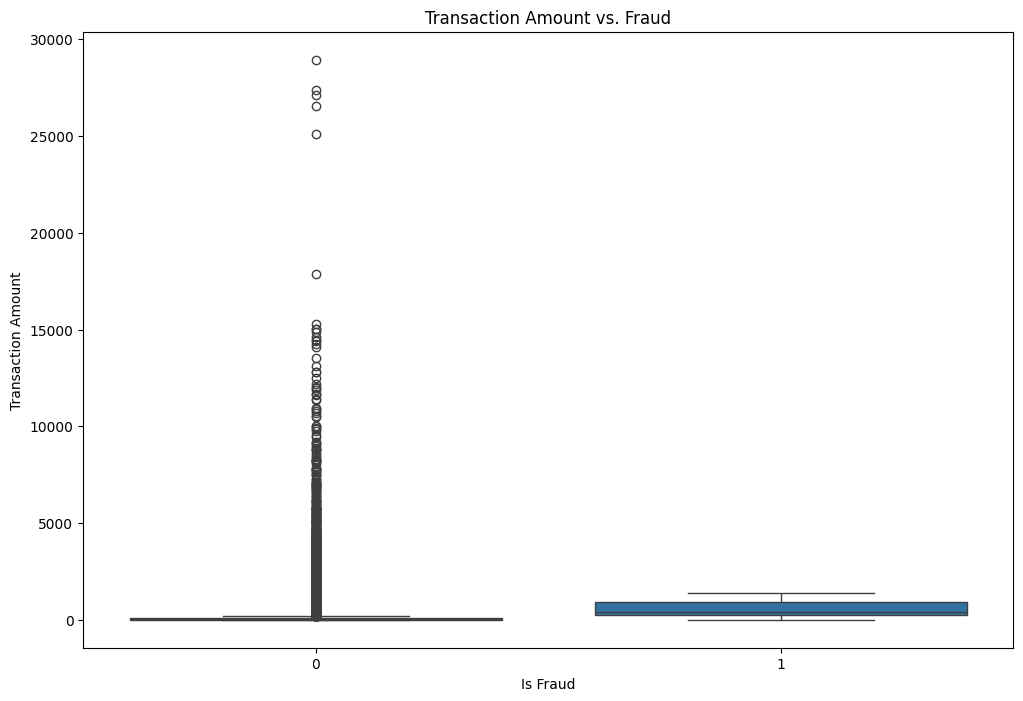

In [30]:
# Explore the distribution of transaction amounts by fraud status
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=train_data)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

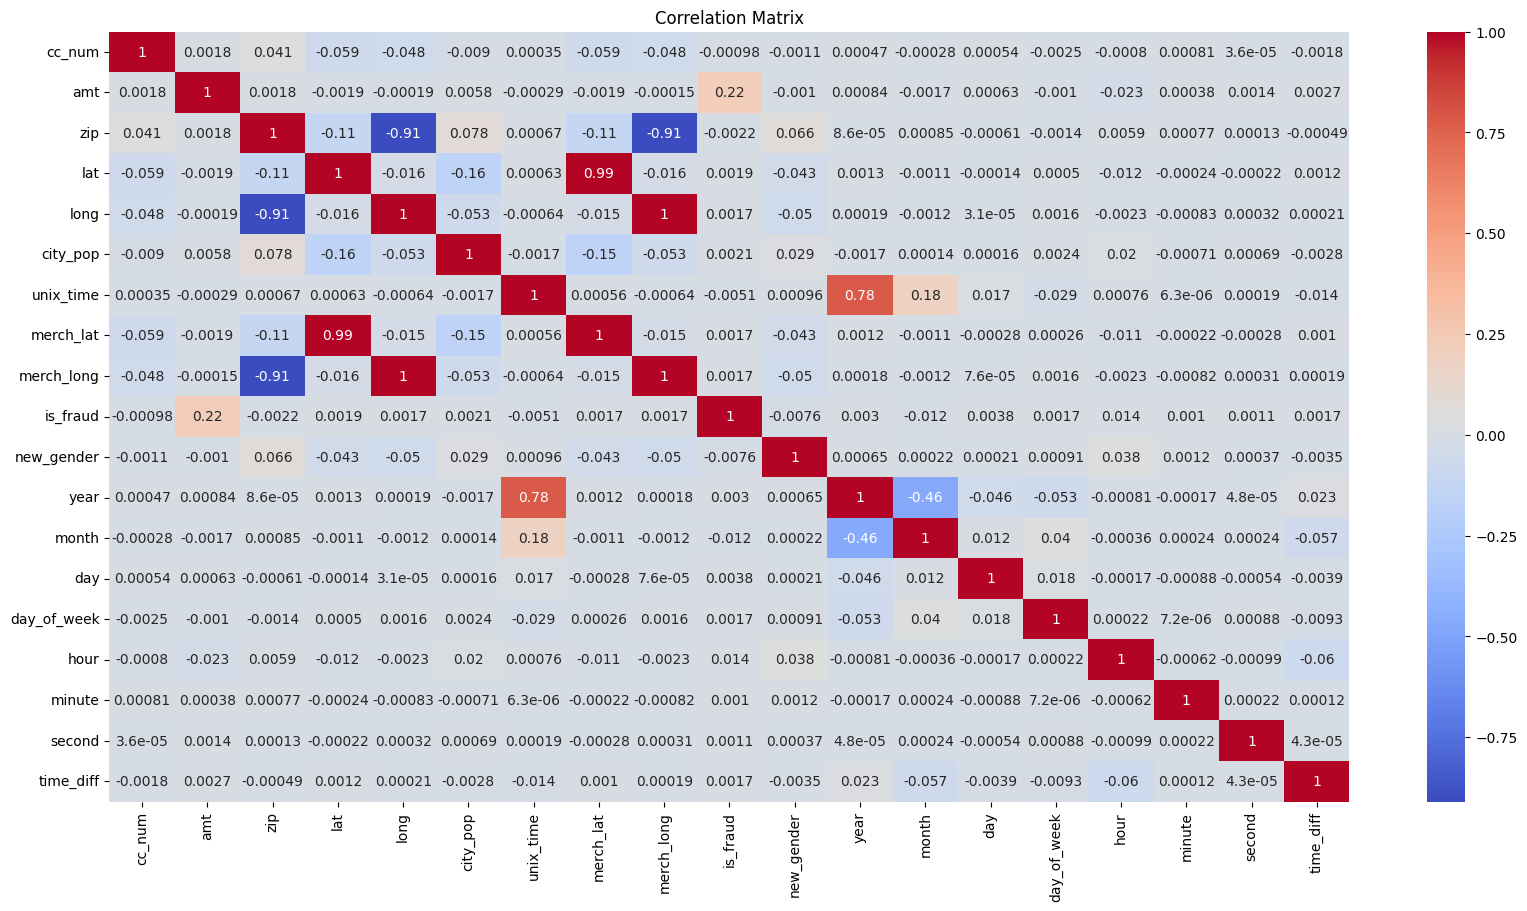

In [31]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = train_data.select_dtypes(include=[np.number])

# Calculate correlation matrix
# Explore the correlation between numerical features
corr_matrix = numeric_columns.corr()

# Plot correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

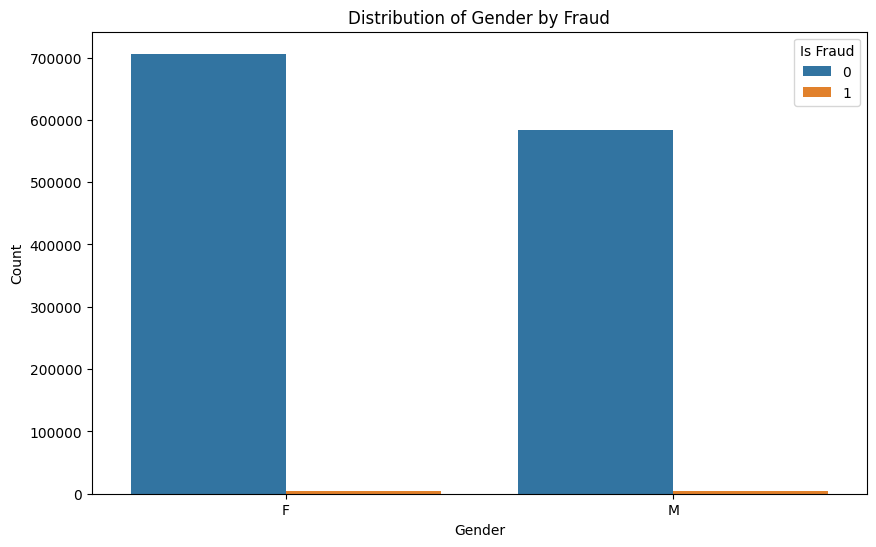

In [32]:
# Explore categorical features (e.g., gender)
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_fraud', data=train_data)
plt.title('Distribution of Gender by Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

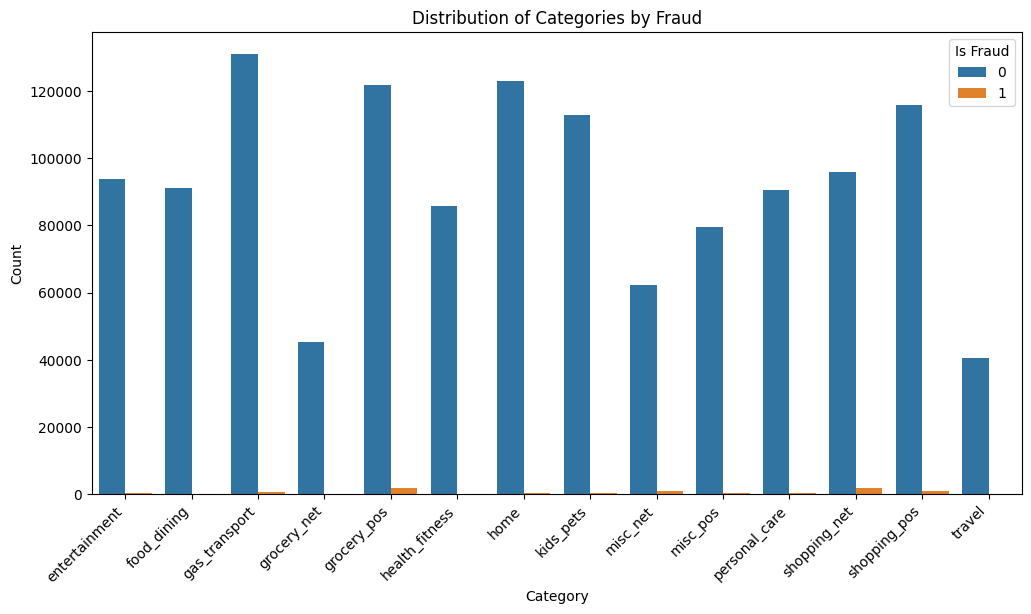

In [33]:
# Explore categorical features (e.g., category)
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=train_data)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

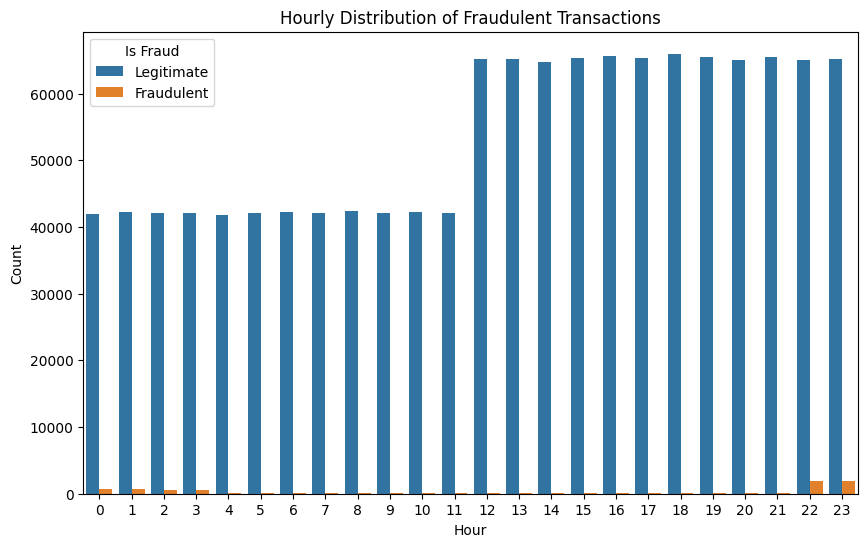

In [34]:
# Plot hourly distribution of fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', hue='is_fraud', data=train_data)
plt.title('Hourly Distribution of Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['Legitimate', 'Fraudulent'])
plt.show()

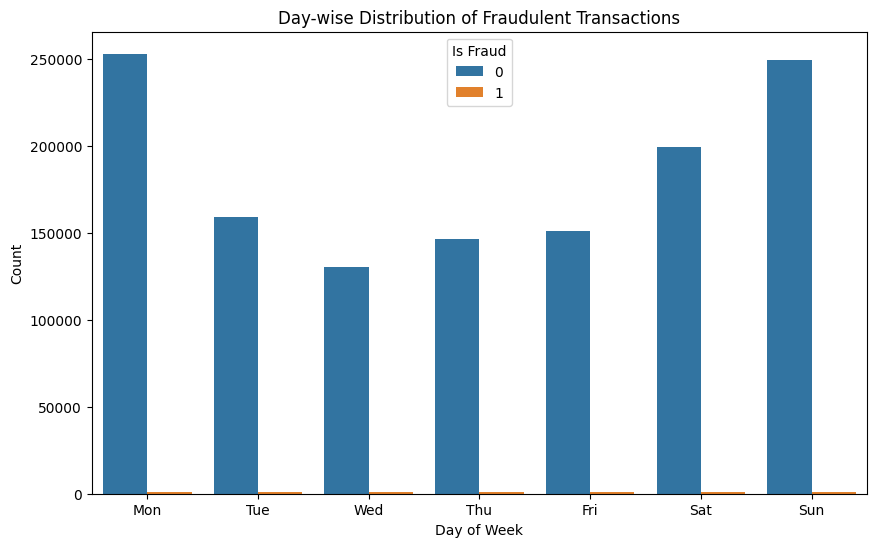

In [35]:
# Plot day-wise distribution of fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue='is_fraud', data=train_data)
plt.title('Day-wise Distribution of Fraudulent Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Is Fraud')
plt.show()

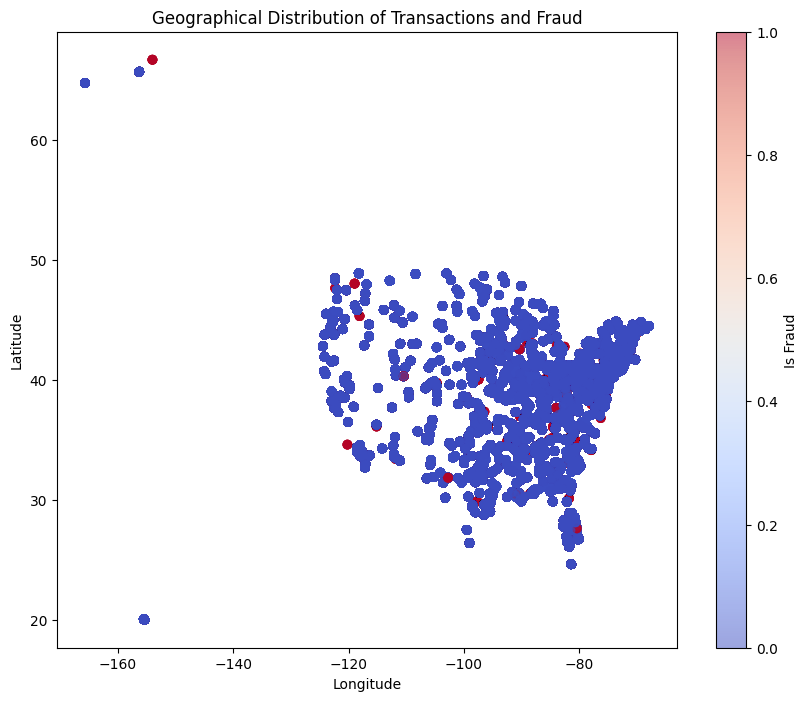

In [36]:
# Scatter plot of geographical data
plt.figure(figsize=(10, 8))
plt.scatter(train_data['long'], train_data['lat'], c=train_data['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Geographical Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Is Fraud')
plt.show()

In [37]:
#To see the distrubution on map we can use this code
import folium

# Filter DataFrame to include only fraudulent transactions
fraudulent_transactions = train_data[train_data['is_fraud'] == 1] 

# Calculate mean latitude and longitude
mean_lat = fraudulent_transactions['lat'].mean()
mean_long = fraudulent_transactions['long'].mean()

# Create a map centered at the mean latitude and longitude
mymap = folium.Map(location=[mean_lat, mean_long], zoom_start=10)

# Iterate through latitude and longitude of fraudulent transactions and add markers to the map
for index, row in fraudulent_transactions.iterrows():
    folium.Marker([row['lat'], row['long']], tooltip="Fraud").add_to(mymap)

# Display the map
mymap.save('fraud_map.html')  # Save the map as an HTML file


<Figure size 1000x600 with 0 Axes>

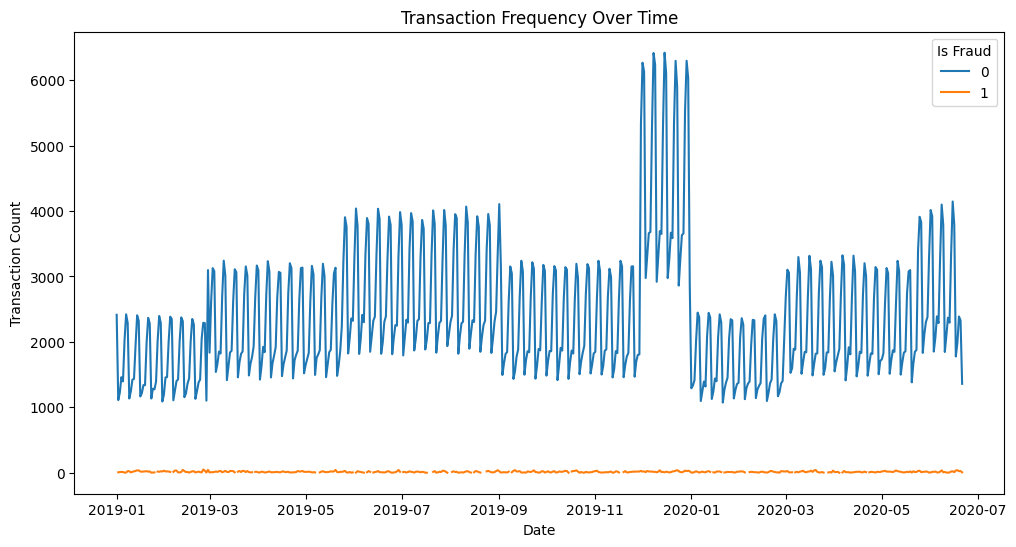

In [38]:
# Transaction Frequency Analysis
plt.figure(figsize=(10, 6))
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['trans_date'] = train_data['trans_date_trans_time'].dt.date
transaction_counts = train_data.groupby(['trans_date', 'is_fraud']).size().unstack()
transaction_counts.plot(kind='line', figsize=(12, 6))
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud')
plt.show()

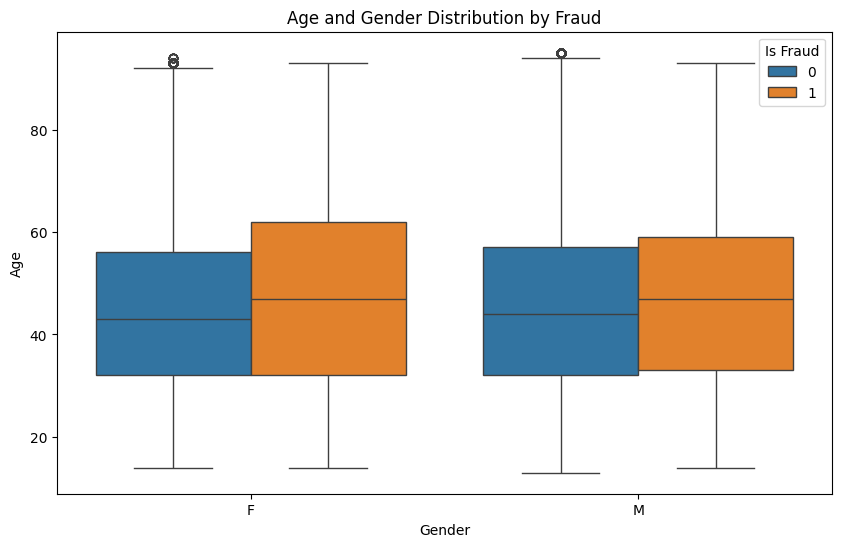

In [39]:
# Age and Gender Analysis
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['age'] = (train_data['trans_date_trans_time'] - train_data['dob']).dt.days // 365
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', hue='is_fraud', data=train_data)
plt.title('Age and Gender Distribution by Fraud')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Is Fraud')
plt.show()

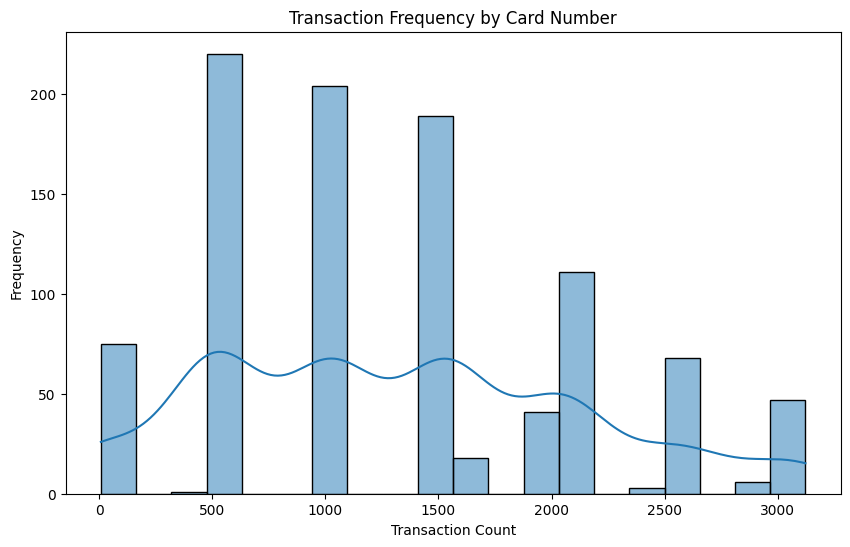

In [40]:
# Transaction Frequency by Card Number
card_transaction_counts = train_data['cc_num'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(card_transaction_counts, bins=20, kde=True)
plt.title('Transaction Frequency by Card Number')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()

In [41]:
# Encode categorical variables
encoder = OneHotEncoder(drop='first')
categorical_cols = ['gender', 'category', 'state']
encoded_train_features = encoder.fit_transform(train_data[categorical_cols]).toarray()
encoded_test_features = encoder.transform(test_data[categorical_cols]).toarray()

# Feature scaling
scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']
scaled_train_features = scaler.fit_transform(train_data[numerical_cols])
scaled_test_features = scaler.transform(test_data[numerical_cols])


# Concatenate encoded and scaled features for both train and test data
final_train_features = pd.concat([pd.DataFrame(encoded_train_features), pd.DataFrame(scaled_train_features)], axis=1)
final_test_features = pd.concat([pd.DataFrame(encoded_test_features), pd.DataFrame(scaled_test_features)], axis=1)

# Define target variables
train_target = train_data['is_fraud']
test_target = test_data['is_fraud']

In [42]:
# Generating synthetic data to balance the imbalanced dataset
smote = SMOTE(random_state=36)

x_train_resample, y_train_resample = smote.fit_resample(final_train_features, train_target)

In [43]:
# checking newly created data
print('Current length of the training set: ', len(y_train_resample))

Current length of the training set:  2578338


C:\Users\Anar\AppData\Local\Temp\ipykernel_19128\3586985647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resample, palette=colors)


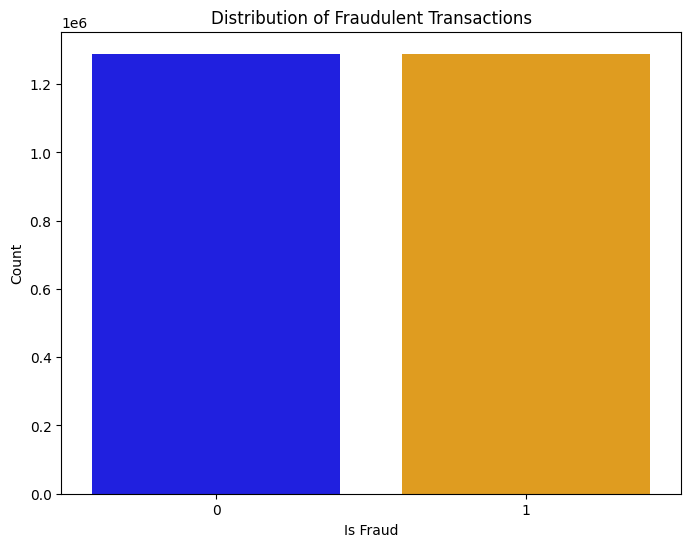

In [44]:
colors = ["blue", "orange"]

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resample, palette=colors)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [45]:
X_shuffled, y_shuffled = shuffle(x_train_resample, y_train_resample, random_state=42)

In [46]:
x_train, x_validation, y_train, y_validation = train_test_split(X_shuffled, y_shuffled, test_size=0.5)

In [47]:
# for the initial selection process we will use a tiny portion of the actual training dataset
x_train_copy = x_train
y_train_copy = y_train

x_train = x_train[:10000]
y_train = y_train[:10000]

In [48]:
# Train Logistic Regression model
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

# Make predictions on test data
lg_predictions = lg_model.predict(x_validation)

# Calculate evaluation metrics on test data
lg_accuracy = accuracy_score(y_validation, lg_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Logistic Regression Accuracy: {:.3f}%".format(lg_accuracy * 100))

C:\Users\Anar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 81.096%


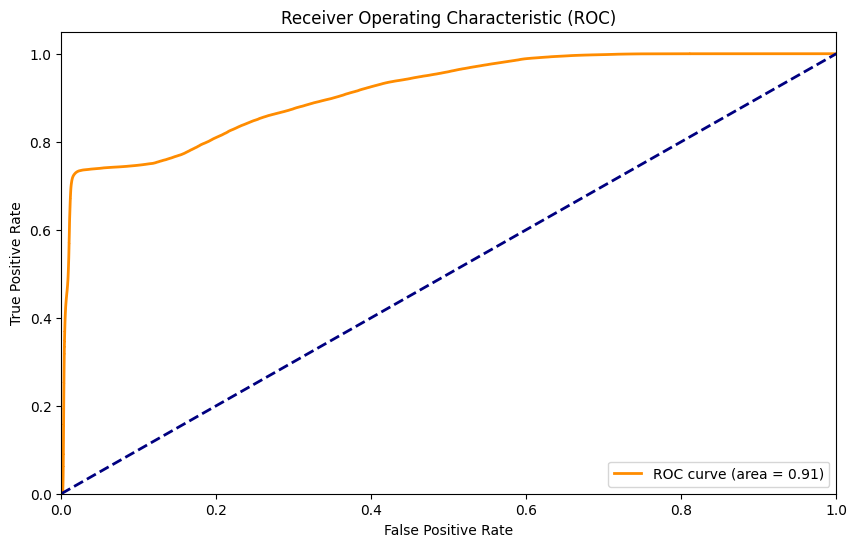

In [49]:
# Calculate ROC curve and AUC
probs = lg_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

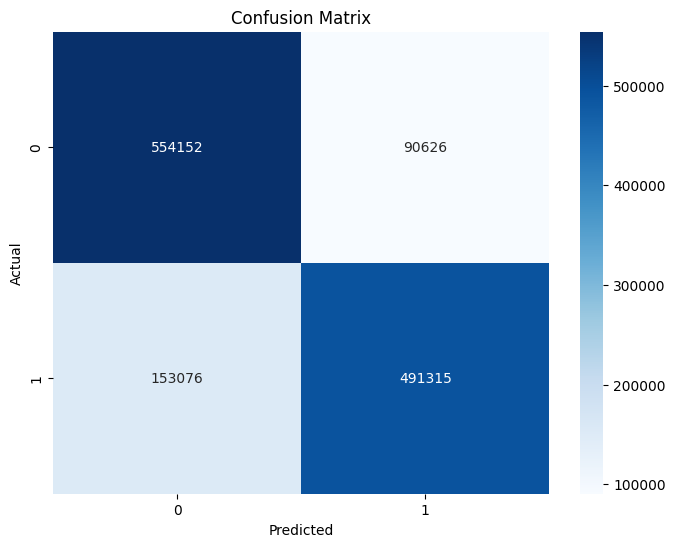

In [50]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, lg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
# Train SVM model
from sklearn.svm import SVC
svm_model = SVC(kernel='poly')
svm_model.fit(x_train, y_train)

# Make predictions on test data
svm_predictions = svm_model.predict(x_validation)

# Calculate evaluation metrics on test data
svm_accuracy = accuracy_score(y_validation, svm_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("SVM Accuracy: {:.3f}%".format(svm_accuracy * 100))

SVM Accuracy: 86.112%


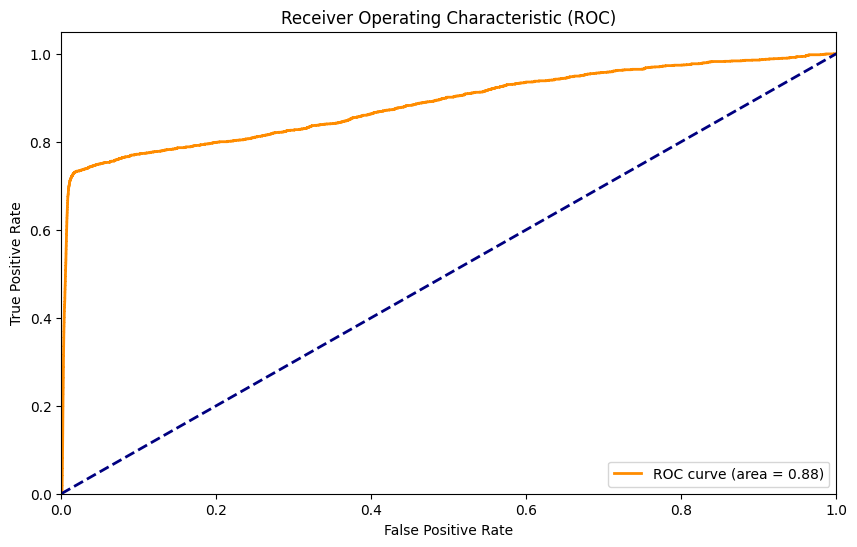

In [52]:
# Calculate decision scores for the positive class
decision_scores = svm_model.decision_function(final_test_features)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_target, decision_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


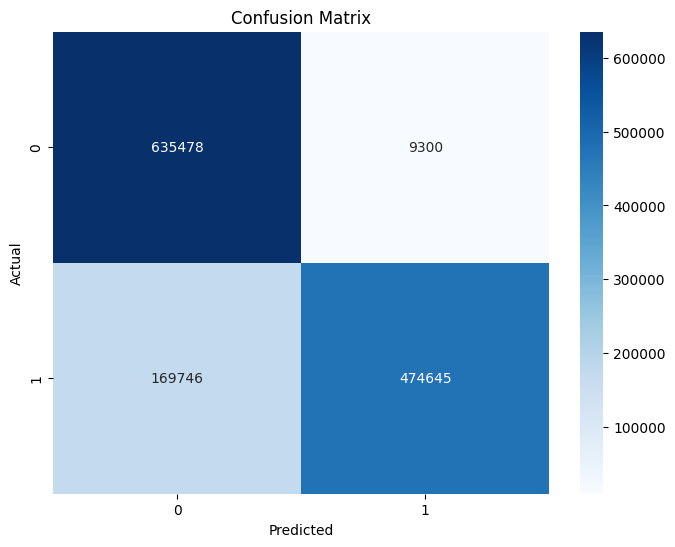

In [53]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
# Train KNN model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
# Make predictions on test data
knn_predictions = knn_model.predict(x_validation)

# Calculate evaluation metrics on test data
knn_accuracy = accuracy_score(y_validation, knn_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("KNN Accuracy: {:.3f}%".format(knn_accuracy * 100))

KNN Accuracy: 87.695%


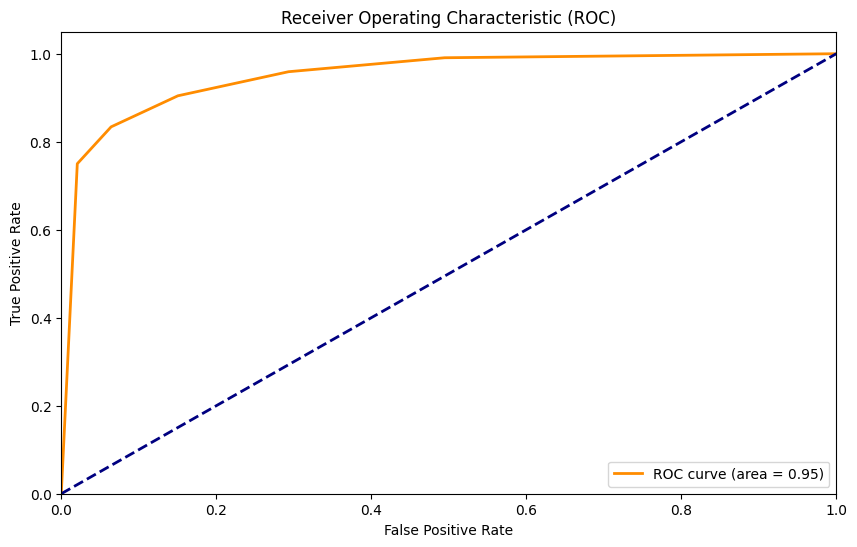

In [55]:
# Calculate ROC curve and AUC
probs = knn_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

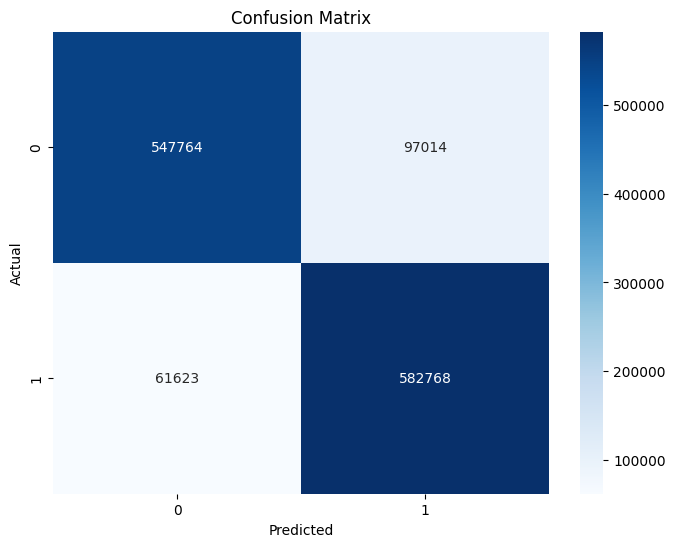

In [56]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
# Make predictions on test data
rf_predictions = rf_model.predict(x_validation)

# Calculate evaluation metrics on test data
rf_accuracy = accuracy_score(y_validation, rf_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Random Forest Accuracy: {:.3f}%".format(rf_accuracy * 100))

Random Forest Accuracy: 97.508%


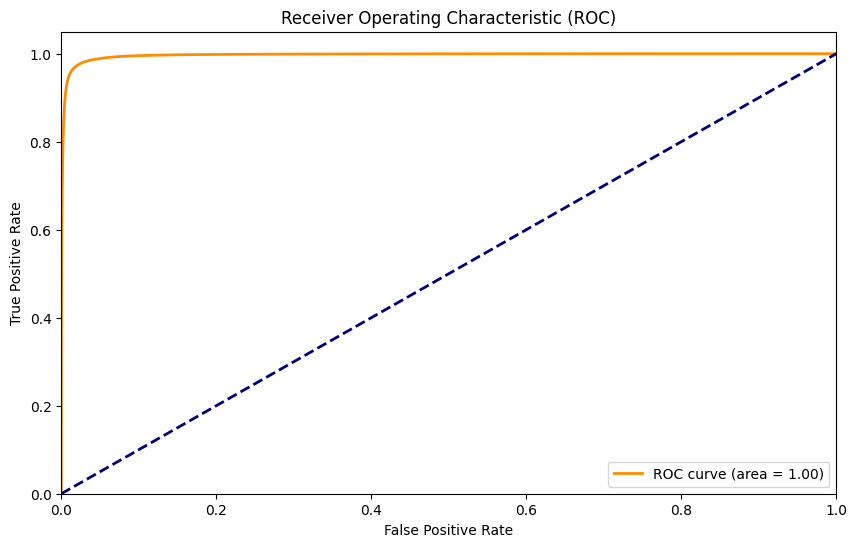

In [58]:
# Calculate ROC curve and AUC
probs = rf_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

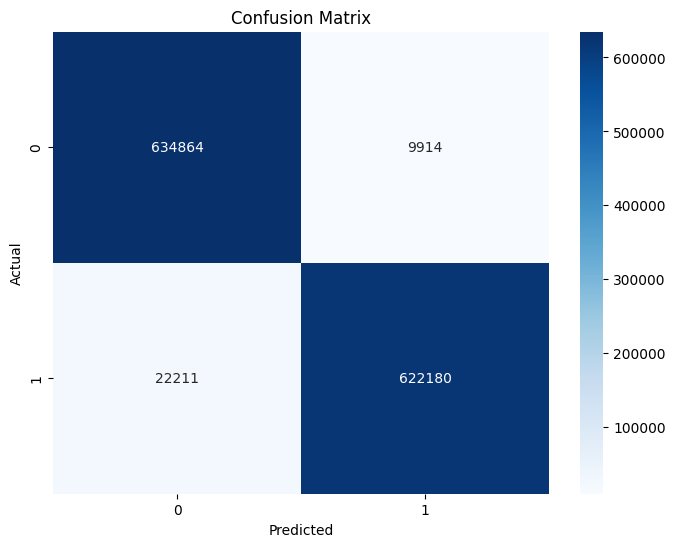

In [59]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [60]:
# Train MLP model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(x_train, y_train)

# Make predictions on test data
mlp_predictions = mlp_model.predict(x_validation)

# Calculate evaluation metrics on test data
mlp_accuracy = accuracy_score(y_validation, mlp_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("MLP Accuracy: {:.3f}%".format(mlp_accuracy * 100))

MLP Accuracy: 95.842%


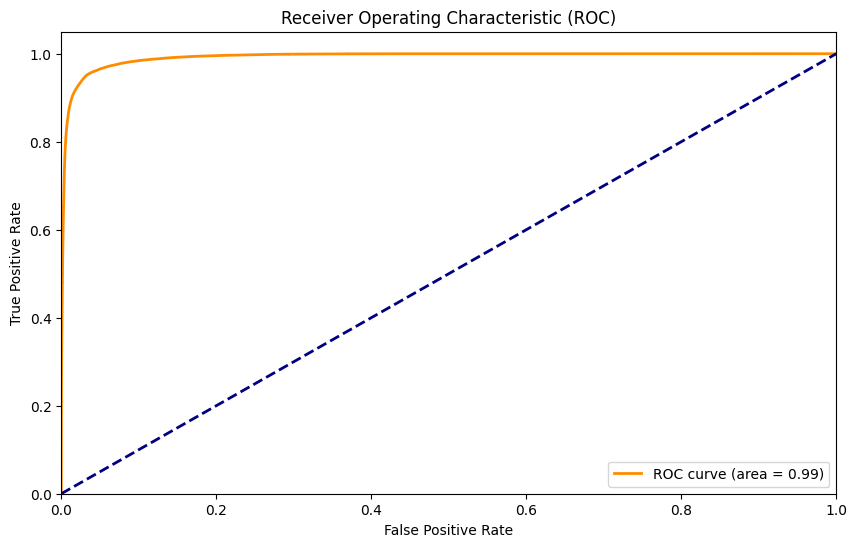

In [61]:
# Calculate ROC curve and AUC
probs = mlp_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

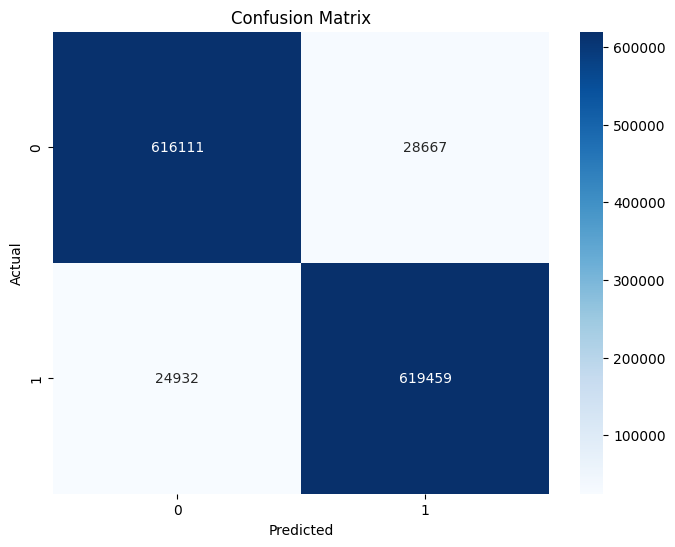

In [62]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, mlp_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
# Train SGD model
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(x_train, y_train)
# Make predictions on test data
sgd_predictions = sgd_model.predict(x_validation)

# Calculate evaluation metrics on test data
sgd_accuracy = accuracy_score(y_validation, sgd_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("SGD Accuracy: {:.3f}%".format(sgd_accuracy * 100))

SGD Accuracy: 85.329%


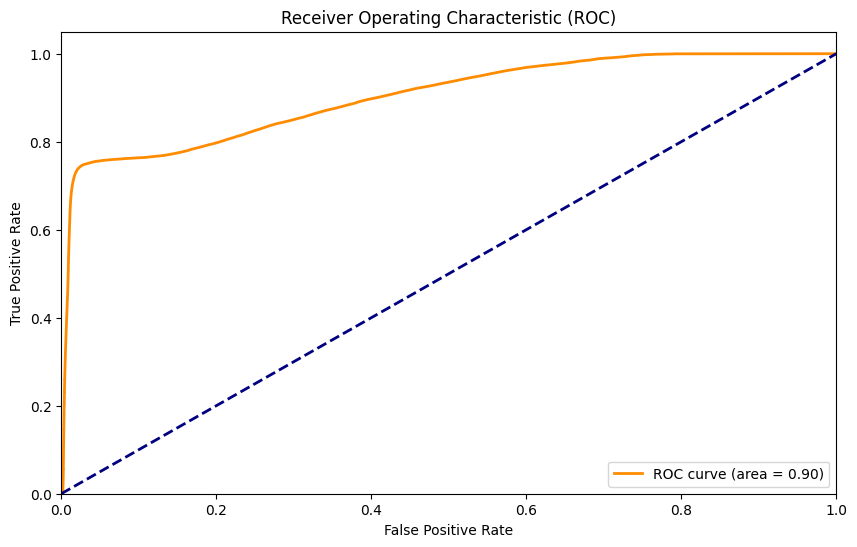

In [64]:
# Calculate decision scores for the positive class
decision_scores = sgd_model.decision_function(x_validation)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_validation, decision_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

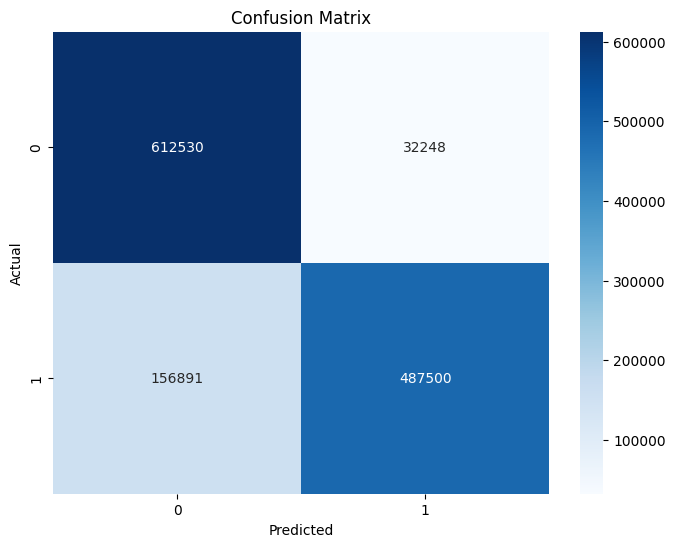

In [65]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
# Train Extra Trees model
extra_trees_model = ExtraTreesClassifier(random_state=42)
extra_trees_model.fit(x_train, y_train)

# Make predictions on test data
ext_predictions = extra_trees_model.predict(x_validation)

# Calculate evaluation metrics on test data
ext_accuracy = accuracy_score(y_validation, ext_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Extra Tree Accuracy: {:.3f}%".format(ext_accuracy * 100))

Extra Tree Accuracy: 97.242%


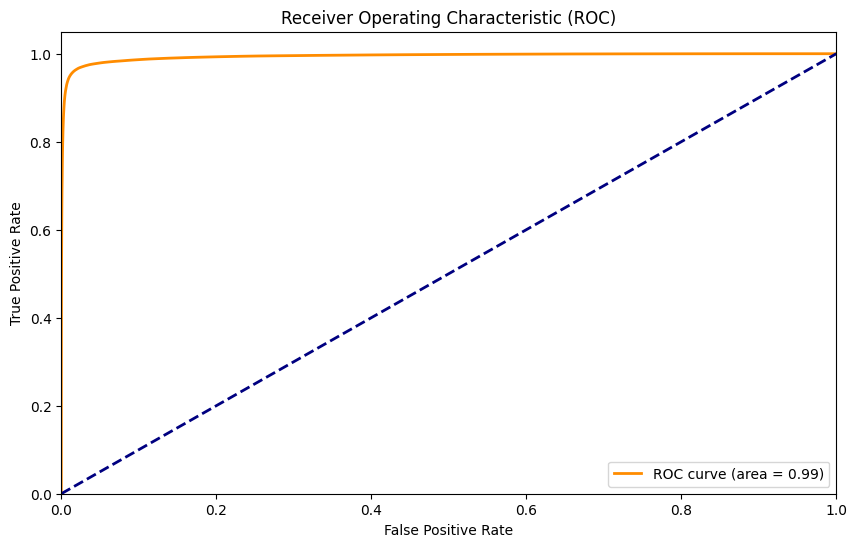

In [67]:
# Calculate ROC curve and AUC
probs = extra_trees_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

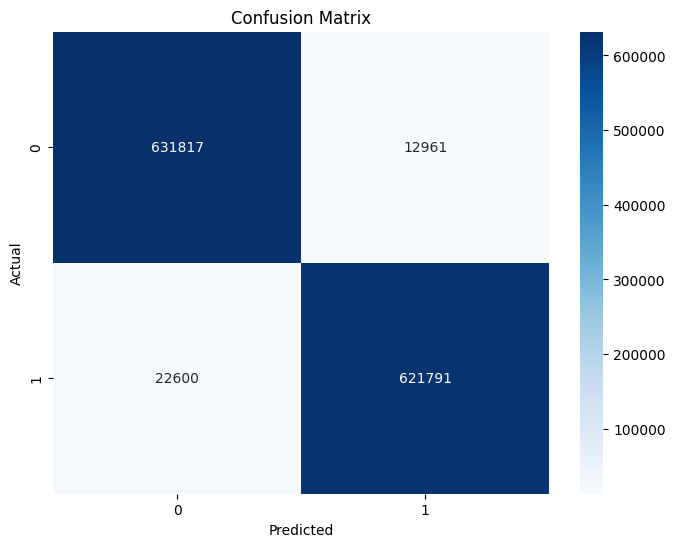

In [68]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, ext_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [69]:
# Define model names and instances
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'MLP', 'SGD', 'Extra Trees']
model_instances = [lg_model, svm_model, knn_model, rf_model, mlp_model, sgd_model, extra_trees_model]

# Initialize lists to store accuracy and ROC scores
accuracy_scores = []
roc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# Calculate accuracy and ROC scores for each model
for model in model_instances:
    predictions = model.predict(final_test_features)
    accuracy = accuracy_score(test_target, predictions)
    roc_score = roc_auc_score(test_target, predictions)
    accuracy_scores.append(accuracy)
    roc_scores.append(roc_score)
    f1_scores.append(f1_score(test_target, predictions))
    precision_scores.append(precision_score(test_target, predictions))
    recall_scores.append(recall_score(test_target, predictions))

# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'ROC Score': roc_scores,
    'F1 Score': f1_scores,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
})

# Print the comparison table
print(results_df)

                 Model  Accuracy  ROC Score  F1 Score  Precision Score  \
0  Logistic Regression  0.913355   0.819281  0.060634         0.031641   
1                  SVM  0.974811   0.855237  0.183790         0.105032   
2                  KNN  0.840041   0.806166  0.035920         0.018388   
3        Random Forest  0.985973   0.920050  0.319630         0.196628   
4                  MLP  0.959634   0.900095  0.138424         0.075426   
5                  SGD  0.974127   0.850482  0.178024         0.101453   
6          Extra Trees  0.982865   0.896895  0.267426         0.160140   

   Recall Score  
0      0.724476  
1      0.734732  
2      0.772028  
3      0.853613  
4      0.840093  
5      0.725874  
6      0.810256  


In [70]:
# Save random forest model as the default
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']